# Task and data description

In this project, I am going to examine the Online shoppers purchasing intention dataset from [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#) and build classification models to predict website visitors purchasing intention. Online shopping is getting more and more popular nowadays (especially after Covid pandemic started). Analyzing customer behaviour to understand how and when they purchase goods online is important to businesses as they can use this information to plan marketing, advertising and sales promotions to increase their sales and revenue.

**Data link**: https://archive.ics.uci.edu/ml/machine-learning-databases/00468/ 

**Source**:
1. C. Okan Sakar
Department of Computer Engineering, Faculty of
Engineering and Natural Sciences, Bahcesehir University,
34349 Besiktas, Istanbul, Turkey

2. Yomi Kastro
Inveon Information Technologies Consultancy and Trade,
34335 Istanbul, Turkey

**Data Set Information**:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user
profile, or period.

From the 12,330 sessions in the dataset, 84.5% (10422) are negative class samples that did not end with shopping, and the rest (1908) are positive class samples ending with shopping. The target variable used is Revenue (False/True).

## Data description

**Administrative**: This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration**: This is the amount of time spent in this category of pages.

**Informational**: This is the number of pages of this type (informational) that the user visited.

**Informational_Duration**: This is the amount of time spent in this category of pages.

**ProductRelated**: This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration**: This is the amount of time spent in this category of pages.

**BounceRates**: Google Analytics Metric. The percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

**ExitRates**: Google Analytics Metric. The percentage of pageviews on the website that end at that specific page.

**PageValues**: The average value for a web page that a user visited before completing an e-commerce transaction.

**SpecialDay**: Closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with a transaction. Values are determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

**Month**: Month of the pageview.

**OperatingSystems**: Operating System of the user.

**Browser**: Browser of the user.

**Region**: Region of the user.

**TrafficType**: Traffic Type of the user.

**VisitorType**: New Visitor, Returning Visitor or Other Visitor type.

**Weekend**: Flag if the page visit was made during the weekend.

**Revenue**: The target column. TRUE means a purchase was made and FALSE means a purchase was not made.

## Load Data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Read the data
data_url = 'https://raw.githubusercontent.com/gergana-drenska/online_shoppers/main/online_shoppers_intention.csv'
df = pd.read_csv(data_url)
print('Data size: {}'.format(df.shape))

Data size: (12330, 18)


In [ ]:
# Display data head
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are 12330 user records and 17 explanatory variables - 10 numeric and 7 categorical. The dataset has no missing values, which is great.

In [ ]:
print('Revenue counts:')
print(df['Revenue'].value_counts())
print('\n')
print('Revenue %s:')
print(round(df['Revenue'].value_counts() / df['Revenue'].value_counts().sum() * 100, 2))

Revenue counts:
False    10422
True      1908
Name: Revenue, dtype: int64


Revenue %s:
False    84.53
True     15.47
Name: Revenue, dtype: float64


The data is imbalanced - 84.5% of negative class and 15.5% of positive class.

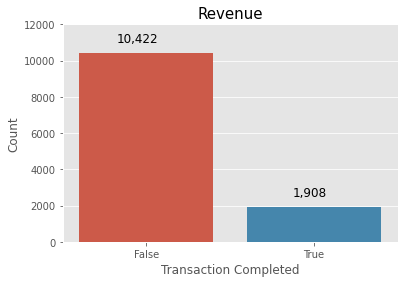

In [ ]:
# Visualize Revenue data
ax = sns.countplot(df['Revenue'])
plt.ylim(0,12000)
plt.title('Revenue', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=12)
plt.text(x=.875, y=2500, s='1,908', fontsize=12)
plt.show()

In [ ]:
cat_cols = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
numeric_cols = list(set(df.columns) - set(cat_cols))
#df[cat_cols]= df[cat_cols].astype('category')

In [ ]:
df[numeric_cols].describe()

,Informational_Duration,ProductRelated,SpecialDay,Administrative,ProductRelated_Duration,PageValues,ExitRates,Administrative_Duration,BounceRates,Informational
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,34.472398,31.731468,0.061427,2.315166,1194.746220,5.889258,0.043073,80.818611,0.022191,0.503569
std,140.749294,44.475503,0.198917,3.321784,1913.669288,18.568437,0.048597,176.779107,0.048488,1.270156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000
50%,0.000000,18.000000,0.000000,1.000000,598.936905,0.000000,0.025156,7.500000,0.003112,0.000000
75%,0.000000,38.000000,0.000000,4.000000,1464.157214,0.000000,0.050000,93.256250,0.016813,0.000000
max,2549.375000,705.000000,1.000000,27.000000,63973.522230,361.763742,0.200000,3398.750000,0.200000,24.000000


In [ ]:
for col in cat_cols:
  print(df[col].value_counts())
  print('\n')

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


False    9462
True     2868
Name: Weekend, dtype: int64




## Fix data types

I will convert Revenue & Weekend from Boolean to Binary, so that it's easier to use them in later calculations.

In [ ]:
df[['Revenue', 'Weekend']] = df[['Revenue', 'Weekend']].astype(int)

In [ ]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object

## Correlation map

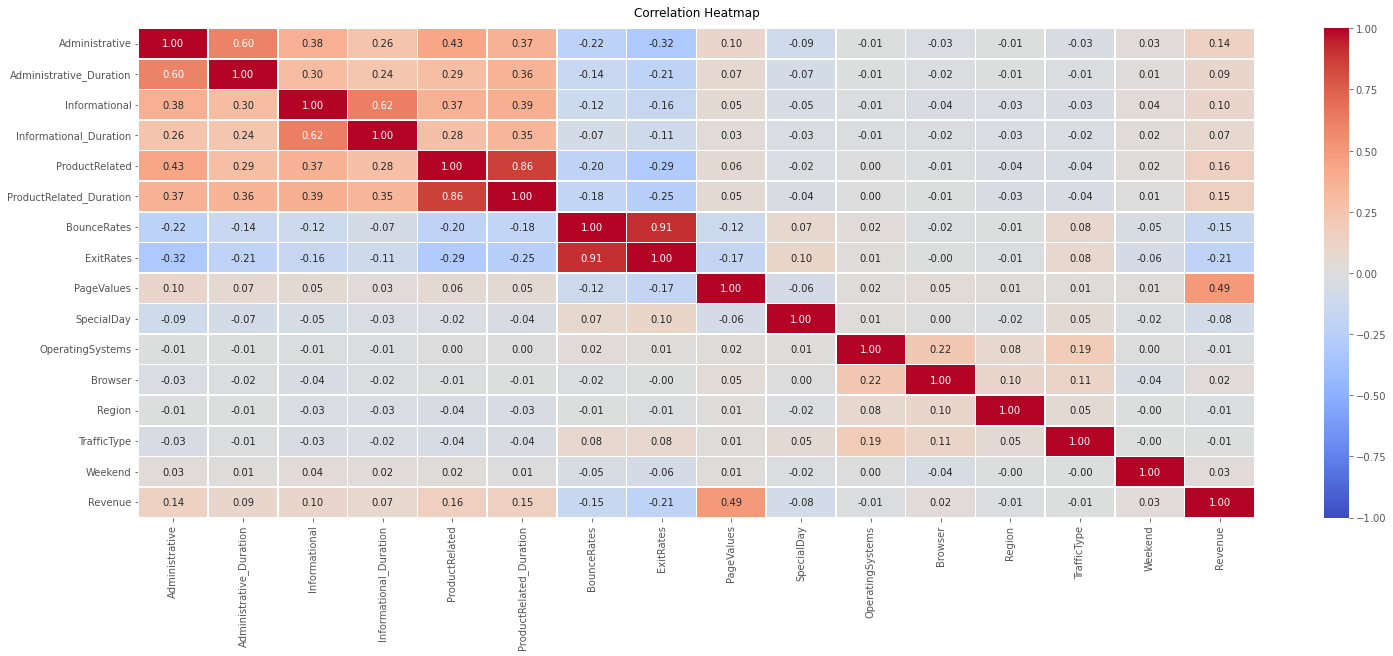

In [ ]:
# Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
heatmap.figure.set_size_inches(25,9)
plt.show()

From the above heatmap, I can conclude the following:
*   There are very little correlation among the different variables.
*   There are very few cases of high correlation between features (|corr| >= 0.7):
  *   BounceRates & ExitRates (0.91)
  *   ProductRelated & ProductRelated_Duration (0.86)
*   Moderate Correlations (0.3 < |corr| < 0.7)
  *   Informational & Informational_Duration (0.62)
  *   Administrative & Administrative_Duration (0.6)
  *   PageValues and **Revenue** (0.49)

## Explore categorical features

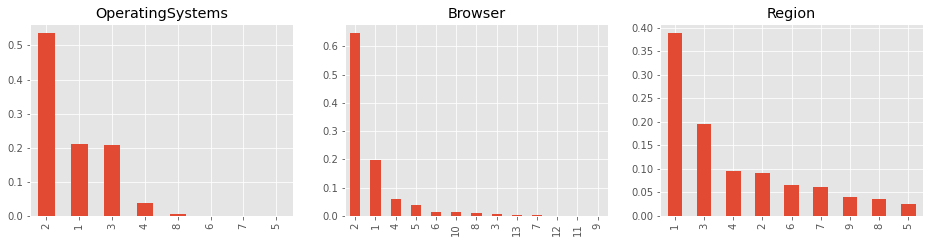

In [ ]:
plt.figure(1)
plt.subplot(331)
df['OperatingSystems'].value_counts(normalize=True).plot.bar(figsize=(16,12), title= 'OperatingSystems')

plt.subplot(332)
df['Browser'].value_counts(normalize=True).plot.bar(figsize=(16,12), title= 'Browser')

plt.subplot(333)
df['Region'].value_counts(normalize=True).plot.bar(figsize=(16,12), title= 'Region')
plt.show()

*   The most used operating systems by the online visitors are from Operating System Type 2, 1 and 3, which is more than 90% of all visitors.
*   The majority of online shop visitors use Browser 2, a smaller number of visitors using Browser 1, and all other browswers are a small amount.
*   Users from Region 1 and 3 are almost 60% of the visitors.

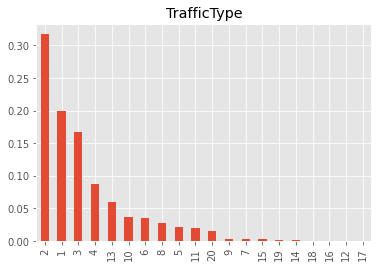

In [ ]:
df['TrafficType'].value_counts(normalize=True).plot.bar(title= 'TrafficType')

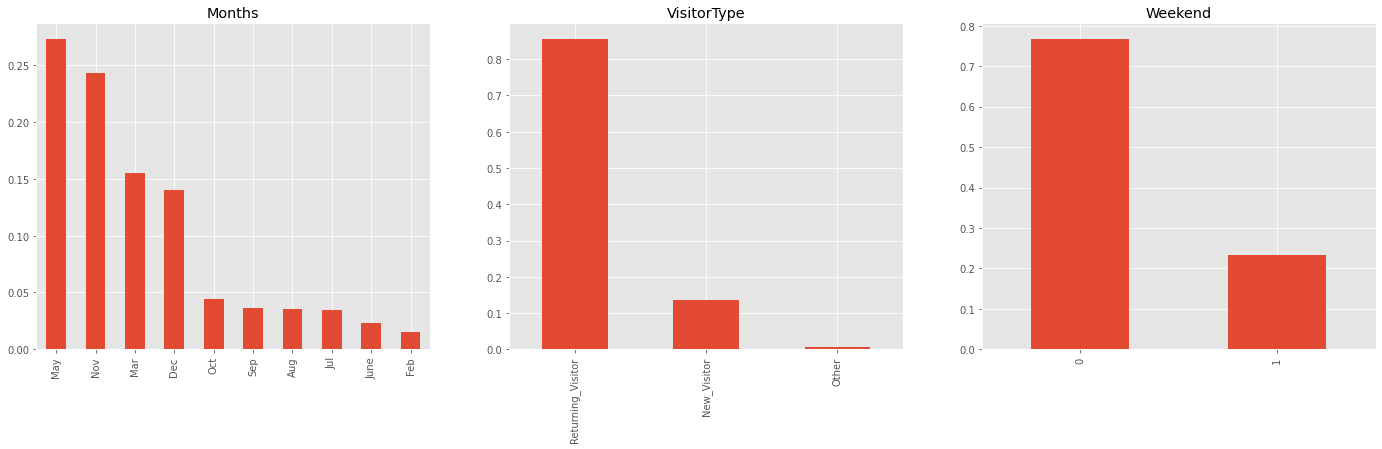

In [ ]:
# Month, Visitor Type, Weekend
plt.figure(2) 
plt.subplot(131) 
df['Month'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Months')

plt.subplot(132) 
df['VisitorType'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'VisitorType')

plt.subplot(133) 
df['Weekend'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Weekend')

*   May and Nov months have more visitors compared to other months, followed by Mar and Dec. Also there are 2 missing months in the data - Jan and Apr.
*   Most of the visitors are returning to the site (Returning visitors are much more than New visitors).
*   Most people visit the website in non weekend days.




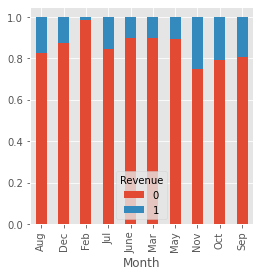

In [ ]:
revenue=pd.crosstab(df['Month'],df['Revenue']) 
revenue.div(revenue.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

People are purchasing more things from the website from August to November , with most purchases in November (Black Friday is usually in November).

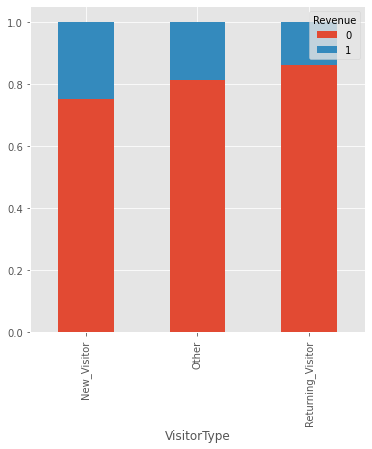

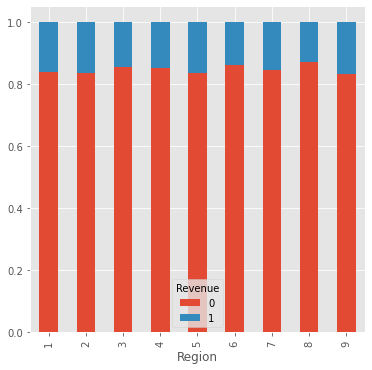

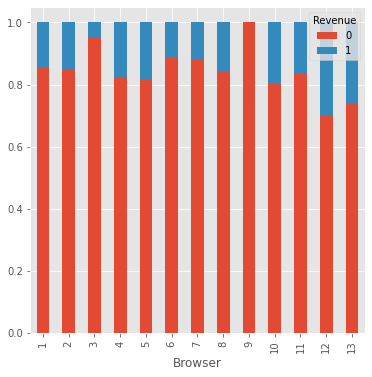

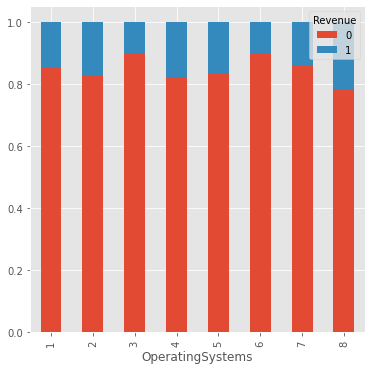

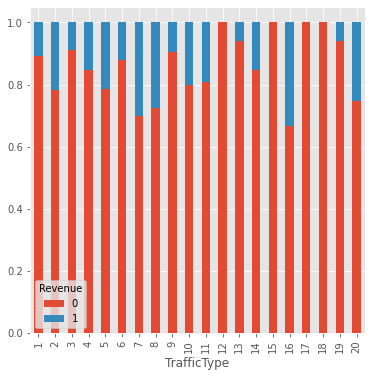

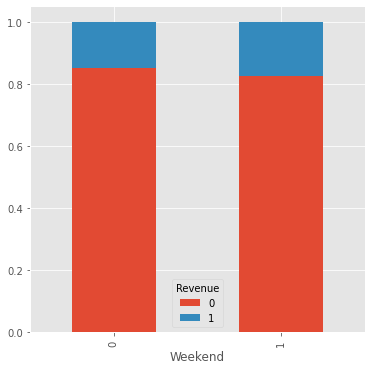

In [ ]:
visitortype=pd.crosstab(df['VisitorType'],df['Revenue']) 
region=pd.crosstab(df['Region'],df['Revenue'])
browser=pd.crosstab(df['Browser'],df['Revenue'])
operatingsys=pd.crosstab(df['OperatingSystems'],df['Revenue'])
traffictype=pd.crosstab(df['TrafficType'],df['Revenue'])
weekend=pd.crosstab(df['Weekend'],df['Revenue'])

visitortype.div(visitortype.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6)) 
plt.show() 
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6)) 
plt.show()
browser.div(browser.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()
operatingsys.div(operatingsys.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()
traffictype.div(traffictype.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()
weekend.div(weekend.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()

As we saw above, users visit the website less in the weekends, but the probability to purchase something during weekend or in a working day is almost equal.

## Google Analytics Page Metrics

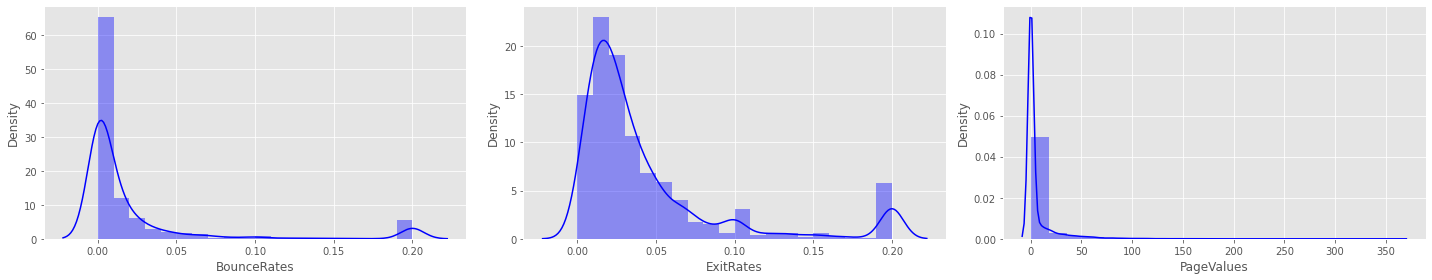

In [ ]:
fig = plt.figure(figsize=(20, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1, color='blue')
sns.distplot(df['ExitRates'], bins=20, ax=ax2, color='blue')
sns.distplot(df['PageValues'], bins=20, ax=ax3, color='blue')

plt.tight_layout()
plt.show()

*   All 3 Google Analytics metrics have right skewed distributions and have outliers
*   The average bounce and exit rates of most of the data points is low, which is good, since high rates identicate that visitors are not engaging with the website.
*   Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase.
*   Bounce rate: The percentage where the first page visited was the only page visited in that session.
*   Exit rate of a page: The percentage where that page was the last page visited in the session, out of all visits to that page.






## Visit month and Special day

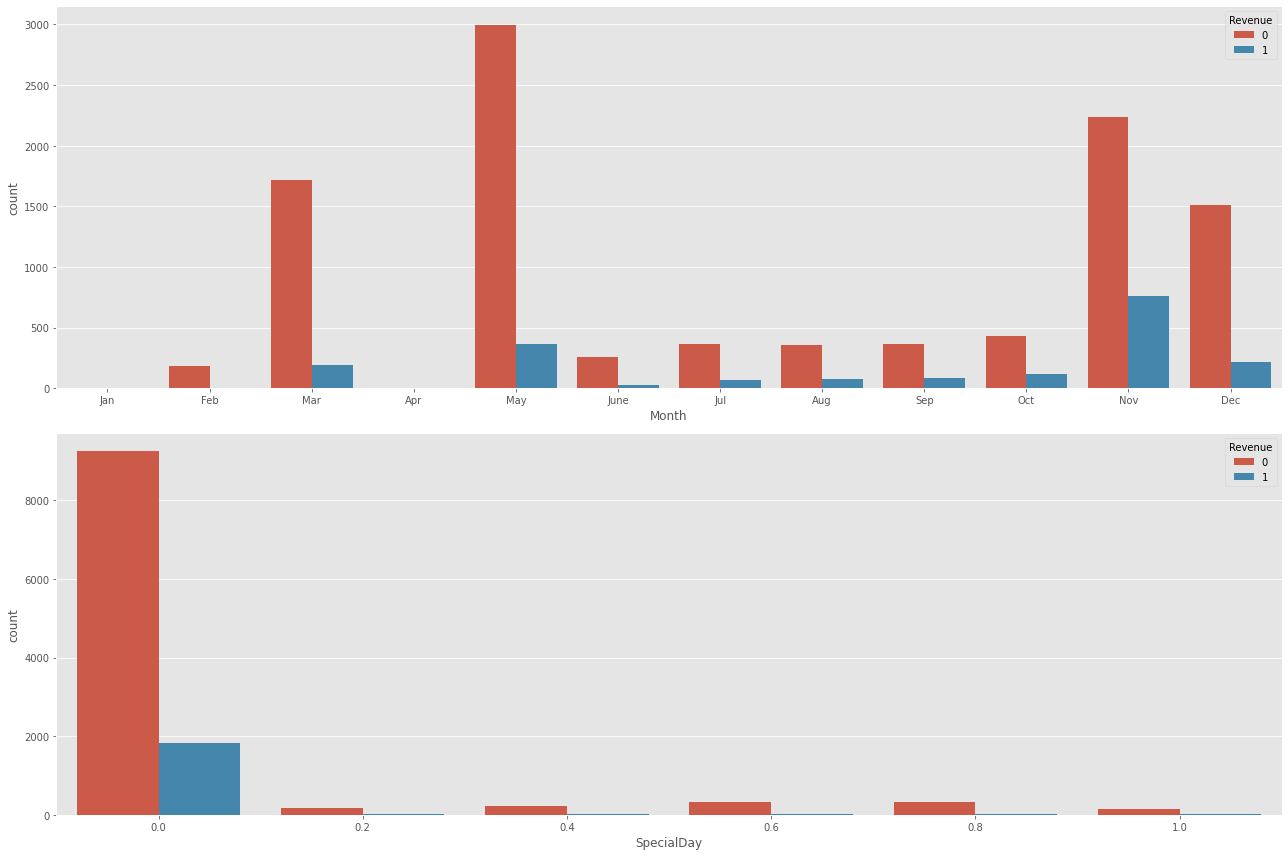

In [ ]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ordered = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=ordered)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

*   The closer the visit date to a special day, the more likely it will end up with a transaction.
*   Lots of users visits in March and May (May is with the highest number of visits), but transactions completed during those 2 months are not on the same level.
*   Most transactions happen during the end of the year, especially November.







## Web Pages

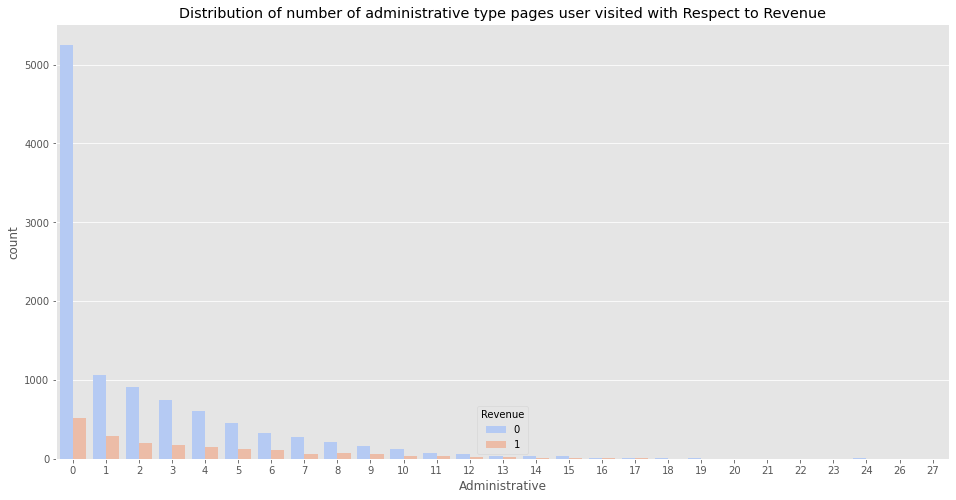

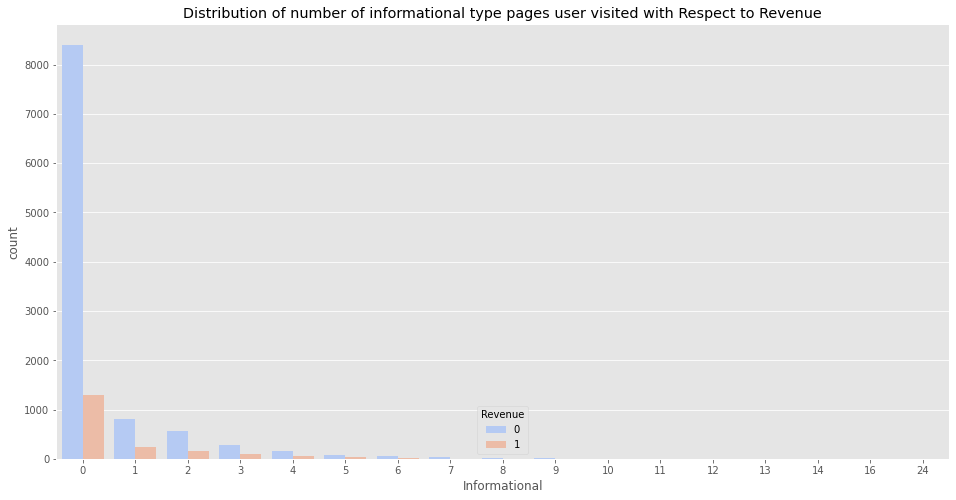

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Distribution of number of administrative type pages user visited with Respect to Revenue')
sns.countplot(x= 'Administrative', hue = 'Revenue', data = df, palette='coolwarm')
plt.show()

plt.figure(figsize = (16,8))
plt.title('Distribution of number of informational type pages user visited with Respect to Revenue')
sns.countplot(x= 'Informational', hue = 'Revenue', data = df, palette='coolwarm')
plt.show()

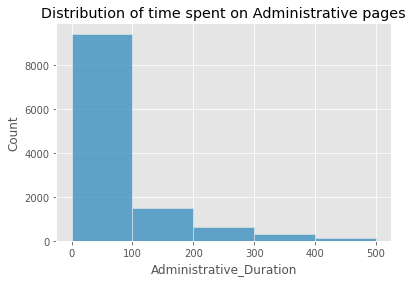

In [ ]:
sns.histplot(df['Administrative_Duration'], bins = [0,100,200,300,400,500])
plt.title('Distribution of time spent on Administrative pages')
plt.show()

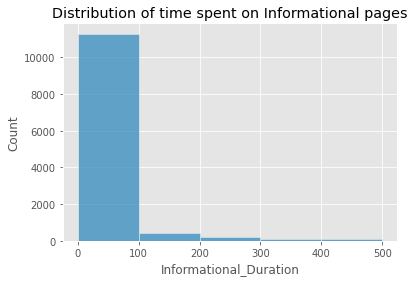

In [ ]:
sns.histplot(df['Informational_Duration'], bins = [0,100,200,300,400,500])
plt.title('Distribution of time spent on Informational pages')
plt.show()

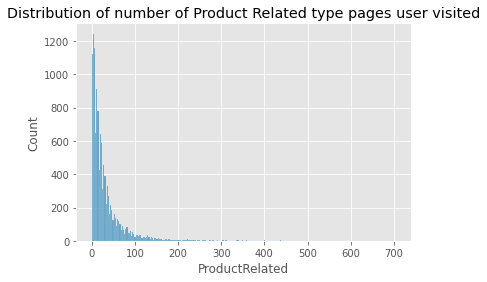

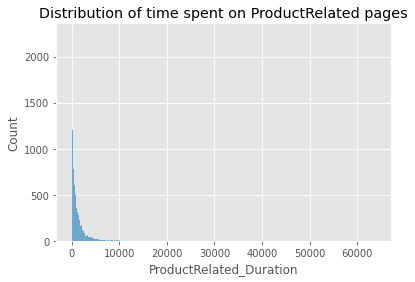

In [ ]:
sns.histplot(df['ProductRelated'])
plt.title('Distribution of number of Product Related type pages user visited')
plt.show()

sns.histplot(df['ProductRelated_Duration'])
plt.title('Distribution of time spent on ProductRelated pages')
plt.show()

In [ ]:
# Remove unneccessary columns
df_clean = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

# Data Pre-Processing

- Will transform Month and VisitorType columns into binary variables
- Split into train and test sets

In [ ]:
# Transform VisitorType into binary variable
df_fin = pd.concat([df_clean, pd.get_dummies(df_clean['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'], axis=1)

print(df_fin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Revenue                        12330 non-null  int64  
 11  VisitorType_New_Visitor        12330 non-null  uint8  
 12  VisitorType_Other              12330 non-null 

In [ ]:
# Split into train and test sets
y = df_fin['Revenue']
X = df_fin.drop(['Revenue'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8631, 13), (8631,), (3699, 13), (3699,))

In [ ]:
print('Train target distribution: {}'.format(y_train.value_counts()))
print('\n')
print('Test target distribution: {}'.format(y_test.value_counts()))

Train target distribution: 0    7295
1    1336
Name: Revenue, dtype: int64


Test target distribution: 0    3127
1     572
Name: Revenue, dtype: int64


# Data Modelling

## **Logistic Regression**

Let's start with Logistic regression, which measures the relationship between Revenue (Intention to purchase) and the independent variables by estimating probabilities using a logistic/sigmoid function.

In [ ]:
lr = LogisticRegression(solver = 'liblinear', random_state=17) 
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]

print('Logistic Regression metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, lr_pred))
print('F1 Score        : ', f1_score(y_test, lr_pred))
print('Precision       : ', precision_score(y_test, lr_pred))
print('Recall          : ', recall_score(y_test, lr_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, lr_pred))
print('Area under ROC  : ', roc_auc_score(y_test, lr_proba))

Logistic Regression metrics:
----------------------------------------
Accuracy        :  0.878345498783455
F1 Score        :  0.4767441860465117
Precision       :  0.7118055555555556
Recall          :  0.3583916083916084
Confusion Matrix:
  [[3044   83]
 [ 367  205]]
Area under ROC  :  0.8756119160660255


Accuracy of initial model is 0.88. If it wasn't imbalanced data, it would be good, but in our case, this metric is not informative for the model. A better metric to look at here is F1 score - 0.48, which is low, and area under ROC curve - 0.88. Precision looks ok, but Recall is very low.

Let's apply oversampling and try again.

In [ ]:
print(X_oversample.shape)
print(y_oversample.shape)
print(X_test.shape)
print(y_test.shape)

(14590, 13)
(14590,)
(3699, 13)
(3699,)


In [ ]:
lr2 = LogisticRegression(solver = 'liblinear', random_state=17) 
lr2.fit(X_oversample, y_oversample)

lr_train_pred = lr2.predict(X_oversample)
lr_train_proba = lr2.predict_proba(X_oversample)[:, 1]

lr_test_pred = lr2.predict(X_test)
lr_test_proba = lr2.predict_proba(X_test)[:, 1]

print('Logistic Regression Train metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_oversample, lr_train_pred))
print('F1 Score        : ', f1_score(y_oversample, lr_train_pred))
print('Precision       : ', precision_score(y_oversample, lr_train_pred))
print('Recall          : ', recall_score(y_oversample, lr_train_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_oversample, lr_train_pred))
print('Area under ROC  : ', roc_auc_score(y_oversample, lr_train_proba))

print('Logistic Regression Test metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, lr_test_pred))
print('F1 Score        : ', f1_score(y_test, lr_test_pred))
print('Precision       : ', precision_score(y_test, lr_test_pred))
print('Recall          : ', recall_score(y_test, lr_test_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, lr_test_pred))
print('Area under ROC  : ', roc_auc_score(y_test, lr_test_proba))

Logistic Regression Train metrics:
----------------------------------------
Accuracy        :  0.8206305688827964
F1 Score        :  0.8047743379336068
Precision       :  0.8828150572831424
Recall          :  0.7394105551747773
Confusion Matrix:
  [[6579  716]
 [1901 5394]]
Area under ROC  :  0.9000265328623686
Logistic Regression Test metrics:
----------------------------------------
Accuracy        :  0.8667207353338741
F1 Score        :  0.6216423637759017
Precision       :  0.5540355677154583
Recall          :  0.708041958041958
Confusion Matrix:
  [[2801  326]
 [ 167  405]]
Area under ROC  :  0.8794992184023204


Now, let's tune parameters.

In [ ]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'solver': ['liblinear'], 
              'penalty': ['l1', 'l2'], 
              'max_iter': [100, 200, 300]} 
lr_grid = GridSearchCV(LogisticRegression(random_state=17), 
                       lr_param_grid, 
                       scoring = 'roc_auc', 
                       cv=5, 
                       refit=True, 
                       verbose=3)

In [ ]:
lr_grid.fit(X_oversample, y_oversample)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.887 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.888 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.883 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.895 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.878 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.905 total time=   0.2s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.902 total time=   0.2s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.903 total time=   0.2s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.902 total time=   0.2s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=l

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=17),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc', verbose=3)

In [ ]:
lr_grid.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
lr_grid = LogisticRegression(C=0.01, max_iter = 100, penalty = 'l2', random_state=17, solver='liblinear')
lr_grid.fit(X_oversample, y_oversample)

lr_train_pred = lr_grid.predict(X_oversample)
lr_train_proba = lr_grid.predict_proba(X_oversample)[:, 1]

lr_test_pred = lr_grid.predict(X_test)
lr_test_proba = lr_grid.predict_proba(X_test)[:, 1]

In [ ]:
print('Logistic Regression Train metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_oversample, lr_train_pred))
print('F1 Score        : ', f1_score(y_oversample, lr_train_pred))
print('Precision       : ', precision_score(y_oversample, lr_train_pred))
print('Recall          : ', recall_score(y_oversample, lr_train_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_oversample, lr_train_pred))
print('Area under ROC  : ', roc_auc_score(y_oversample, lr_train_proba))

print('Logistic Regression Test metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, lr_test_pred))
print('F1 Score        : ', f1_score(y_test, lr_test_pred))
print('Precision       : ', precision_score(y_test, lr_test_pred))
print('Recall          : ', recall_score(y_test, lr_test_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, lr_test_pred))
print('Area under ROC  : ', roc_auc_score(y_test, lr_test_proba))

Logistic Regression Train metrics:
----------------------------------------
Accuracy        :  0.8220013708019192
F1 Score        :  0.8064684402712573
Precision       :  0.8835728282168517
Recall          :  0.7417409184372858
Confusion Matrix:
  [[6582  713]
 [1884 5411]]
Area under ROC  :  0.9005690472175024
Logistic Regression Test metrics:
----------------------------------------
Accuracy        :  0.8648283319816167
F1 Score        :  0.6177370030581041
Precision       :  0.5489130434782609
Recall          :  0.7062937062937062
Confusion Matrix:
  [[2795  332]
 [ 168  404]]
Area under ROC  :  0.880312683798453


After tuning, there's no much improvement.

## **Random Forest Classifier**

Now, let's see what Random forest wil give us.

In [ ]:
rf = RandomForestClassifier(random_state=17)
rf.fit(X_oversample, y_oversample)

rf_train_pred = rf.predict(X_oversample)
rf_train_proba = rf.predict_proba(X_oversample)[:, 1]

rf_test_pred = rf.predict(X_test)
rf_test_proba = rf.predict_proba(X_test)[:, 1]

print('Random Forest Train metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_oversample, rf_train_pred))
print('F1 Score        : ', f1_score(y_oversample, rf_train_pred))
print('Precision       : ', precision_score(y_oversample, rf_train_pred))
print('Recall          : ', recall_score(y_oversample, rf_train_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_oversample, rf_train_pred))
print('Area under ROC  : ', roc_auc_score(y_oversample, rf_train_proba))

print('Random Forest Test metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, rf_test_pred))
print('F1 Score        : ', f1_score(y_test, rf_test_pred))
print('Precision       : ', precision_score(y_test, rf_test_pred))
print('Recall          : ', recall_score(y_test, rf_test_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, rf_test_pred))
print('Area under ROC  : ', roc_auc_score(y_test, rf_test_proba))

Random Forest Train metrics:
----------------------------------------
Accuracy        :  0.9993145990404386
F1 Score        :  0.9993141289437586
Precision       :  1.0
Recall          :  0.9986291980808774
Confusion Matrix:
  [[7295    0]
 [  10 7285]]
Area under ROC  :  0.9996433941957484
Random Forest Test metrics:
----------------------------------------
Accuracy        :  0.8859151121924844
F1 Score        :  0.6278659611992945
Precision       :  0.6334519572953736
Recall          :  0.6223776223776224
Confusion Matrix:
  [[2921  206]
 [ 216  356]]
Area under ROC  :  0.8883824841611858


Let's tune a little the parameters.

In [ ]:
rf_param_grid = {'n_estimators': [100,200,300], 
                 'max_features': ['sqrt', 'log2'], 
                 'max_depth': [4,5,6,7], 
                 'min_samples_split': [10,20,30]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=17), 
                       rf_param_grid, 
                       scoring = 'roc_auc', 
                       cv=5, 
                       refit=True, 
                       verbose=3)

In [ ]:
rf_grid.fit(X_oversample, y_oversample)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.912 total time=   0.7s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.915 total time=   0.7s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.919 total time=   0.7s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.916 total time=   0.7s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.7s
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.911 total time=   1.3s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.915 total time=   1.3s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.918 total time=   1.3s
[C

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=3)

In [ ]:
rf_grid.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
rf_grid = RandomForestClassifier(max_depth = 7, 
                                 max_features = 'sqrt', 
                                 min_samples_split = 10, 
                                 n_estimators = 300, 
                                 random_state = 17)
rf_grid.fit(X_oversample, y_oversample)

rf_train_pred = rf_grid.predict(X_oversample)
rf_train_proba = rf_grid.predict_proba(X_oversample)[:, 1]

rf_test_pred = rf_grid.predict(X_test)
rf_test_proba = rf_grid.predict_proba(X_test)[:, 1]

In [ ]:
print('Random Forest Train metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_oversample, rf_train_pred))
print('F1 Score        : ', f1_score(y_oversample, rf_train_pred))
print('Precision       : ', precision_score(y_oversample, rf_train_pred))
print('Recall          : ', recall_score(y_oversample, rf_train_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_oversample, rf_train_pred))
print('Area under ROC  : ', roc_auc_score(y_oversample, rf_train_proba))

print('Random Forest Test metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, rf_test_pred))
print('F1 Score        : ', f1_score(y_test, rf_test_pred))
print('Precision       : ', precision_score(y_test, rf_test_pred))
print('Recall          : ', recall_score(y_test, rf_test_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, rf_test_pred))
print('Area under ROC  : ', roc_auc_score(y_test, rf_test_proba))

Random Forest Train metrics:
----------------------------------------
Accuracy        :  0.8703221384509938
F1 Score        :  0.866138389698599
Precision       :  0.895013890919725
Recall          :  0.8390678546949966
Confusion Matrix:
  [[6577  718]
 [1174 6121]]
Area under ROC  :  0.9496849081661367
Random Forest Test metrics:
----------------------------------------
Accuracy        :  0.870235198702352
F1 Score        :  0.6444444444444445
Precision       :  0.5591259640102828
Recall          :  0.7604895104895105
Confusion Matrix:
  [[2784  343]
 [ 137  435]]
Area under ROC  :  0.9012139922757127


Random Forest is able to capture more from the actual class 1, ROC AUC score increased to 0.90 and F1 score to 0.64. <p>Let's check what will be the results with Random Forest, but instead of oversampling, to use **class_weight** parameter of **Random Forest Classifier**. 

In [ ]:
brf_param_grid = {'n_estimators': [100,200,300], 
                 'max_features': ['sqrt', 'log2'], 
                 'max_depth': [4,5,6,7], 
                 'min_samples_split': [10,20,30]}
brf_grid = GridSearchCV(RandomForestClassifier(class_weight = 'balanced_subsample', random_state=17), 
                       brf_param_grid, 
                       scoring = 'roc_auc', 
                       cv=5, 
                       refit=True, 
                       verbose=3)

In [ ]:
brf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.899 total time=   0.6s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.911 total time=   0.6s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.894 total time=   0.6s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.912 total time=   0.7s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.898 total time=   0.6s
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.901 total time=   1.2s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.911 total time=   1.2s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.892 total time=   1.2s
[C

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=17),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=3)

In [ ]:
brf_grid.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_split': 30,
 'n_estimators': 300}

In [ ]:
brf_grid = RandomForestClassifier(class_weight='balanced_subsample', 
                                  max_depth = 7, 
                                  max_features = 'sqrt', 
                                  min_samples_split = 30, 
                                  n_estimators = 300, 
                                  random_state = 17)
brf_grid.fit(X_train, y_train)

brf_train_pred = brf_grid.predict(X_train)
brf_train_proba = brf_grid.predict_proba(X_train)[:, 1]

brf_test_pred = brf_grid.predict(X_test)
brf_test_proba = brf_grid.predict_proba(X_test)[:, 1]

In [ ]:
print('Random Forest Train metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_train, brf_train_pred))
print('F1 Score        : ', f1_score(y_train, brf_train_pred))
print('Precision       : ', precision_score(y_train, brf_train_pred))
print('Recall          : ', recall_score(y_train, brf_train_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_train, brf_train_pred))
print('Area under ROC  : ', roc_auc_score(y_train, brf_train_proba))

print('Random Forest Test metrics:')
print('----------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, brf_test_pred))
print('F1 Score        : ', f1_score(y_test, brf_test_pred))
print('Precision       : ', precision_score(y_test, brf_test_pred))
print('Recall          : ', recall_score(y_test, brf_test_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, brf_test_pred))
print('Area under ROC  : ', roc_auc_score(y_test, brf_test_proba))

Random Forest Train metrics:
----------------------------------------
Accuracy        :  0.8884254431699687
F1 Score        :  0.6966929133858267
Precision       :  0.6014138118542687
Recall          :  0.8278443113772455
Confusion Matrix:
  [[6562  733]
 [ 230 1106]]
Area under ROC  :  0.9425274365593693
Random Forest Test metrics:
----------------------------------------
Accuracy        :  0.8707758853744255
F1 Score        :  0.6464497041420119
Precision       :  0.5602564102564103
Recall          :  0.763986013986014
Confusion Matrix:
  [[2784  343]
 [ 135  437]]
Area under ROC  :  0.9008777040037033


Results with balancing class weight are pretty similar to those with oversampling, here there are just minimal improvement of F1 score.

# Model selection and final results

Comparing the results from the tested algorithms, it seems that RandomForest Classifier with class_weight = 'balanced_subsample' works best: 
- F1 score -> 0.65
- Precision -> 0.56
- Recall -> 0.76
- ROC_AUC score -> 0.90
- Accuracy -> 0.87. 

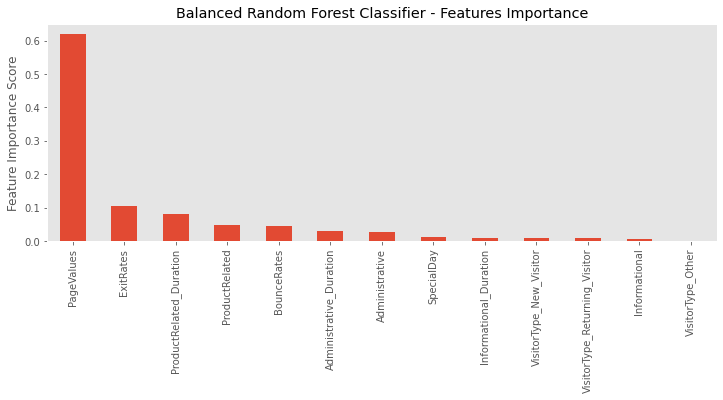

In [ ]:
feat_imp = pd.Series(brf_grid.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Balanced Random Forest Classifier - Features Importance')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [ ]:
feat_imp

PageValues                       0.620104
ExitRates                        0.103494
ProductRelated_Duration          0.082193
ProductRelated                   0.047030
BounceRates                      0.045125
Administrative_Duration          0.030645
Administrative                   0.026143
SpecialDay                       0.011250
Informational_Duration           0.010241
VisitorType_New_Visitor          0.008285
VisitorType_Returning_Visitor    0.007792
Informational                    0.007344
VisitorType_Other                0.000353
dtype: float64

The best predictor of purcahsing intention is PageValues, followed by ExitRates and ProductRelated_Duration and ProductRelated.

## Conclusion

The models are much more accurate than random guessing. By using the last Random Forest classifier, I got 87% accuracy, ROC AUC score of 90% and F1 score of approximately 65%. 
To recall what the most predictive features mean:
- PageValues: The average value for a web page that a user visited before completing an e-commerce transaction.
- ExitRates: Google Analytics Metric. The percentage of pageviews on the website that end at that specific page.
- ProductRelated: This is the number of pages of this type (product related) that the user visited.
- ProductRelated_Duration: This is the amount of time spent in this category of pages.